## Module 4: *(Template)*

**RENAME THE FILE TO INCLUDE YOUR COMPANY, GROUP NUMBER, AND LAST NAMES**

**E.G. KAMEN1_GROVES_MODULE_4.IPYNB**

## Team Members:
Jack O'Hearn, Vincente Carvajal Villegas
## Project Title:
Predicting future cases of Severe Acute Respiratory Syndrome in China in the early 2000's


## Project Goal:
This project seeks to take known data from the SARS outbreak in China from March 2003 to July 2003 and apply ordinary differential equations to predict future cases based on past trends.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

Prevalence & incidence

- Emerged in Guangdong Province, China in November 2002.
- The 2003/2002 Severe Acute Respirtory Syndrome (SARS) outbreak globally caused 8422 cases and 916 deaths. This is around a 11% fatality rate across 29 different countries.
- Specifically, China reported 5327 cases and 348 death between 2002-2003. Approximately 30 cases in CHina were heathcare workers. 

Economic burden

- In the 4 most affected East Asian countries, an estimated $13 billion of SARS-related GDP loss occured. This was driven by drops in travel, tourism, and hospitalityIn Beijing, an estimated $1.4 billion was lost from tourism.
- Other indirect costs occured as well, including business diruption, quartining, higher operating costs, stock market falls, and reduced trade.
- The economic cost in the medical field rose sharply due to isolation wards, personal protective equipment, emergency surveillance expansion, and hospital staffing strain spending.

Risk factors (genetic, lifestyle) & Societal determinants

- The population most at risk were those in and related to the health-care industry. Around 30% of cases came from medical staff not outfitted with proper protective equipment. 
- Older age, underlying conditions, and delayed hosptialization were associated with higher mortality and more severe cases.
- Fatality for those under the age of 24 was under 1%, but over 50% for individuals over 50. 
- Societal determinants included high population density (common in china), hospital crowding (intra-hospital transmission), and increased travel during Chinese New Year (Feburary 1, 2003).

Symptoms

- Common symptoms are high fever, chills, malaise, headache, dry cough, shortness of breath.
- In addition, diarrhea and vomiting were seen.
-Most patients developed pneumonia, and 10-20% reauired mechanical ventilation.

Diagnosis

- Diagnosis occured after a combination of symptoms and context. This included close contact with a SARC case or affected area, plus clinical findings of fever and evidence of pnemonia.
- Reverse-transcription PCR were detected to detect viral DNA, but versions at the time has limited detection/sensitivity in the onset of the illness.
- Chest radiography was also useful in diagnosis, as many patients developed patchy air spaces in the lungs around 7 day into the illness.  

Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)

- SARS is caused by SARS-CoV, which is a single stranded RNA coronavirus that targets the respiratory tract, particularly the lower airways and alveoli.
- The viral spike from SARS binds the angiotensin-converting enzyme 2 (ACE2) receptor on respiratory endothelial cells, as well as type II pneumocytes allowing entry. ACE2 is expressed highly in lung and intestine tissues. 
- SARS-CoV infection and S binding downregulate ACE2, which disrupts its role in the renin-angiotensin system and causing pulmonary vasoconstriction and vascular permeability.
- SARS lungs typically display alveolar damage with hyaline membrane formation and intestitial inflammation. In some cases, also organizing fibrosis. These indicate a strong inflammitory response at the alveolar and capollary barrier.

## Dataset: 

The dataset used in this analysis is made of confirmed case counts from the 2003 Severe Acute Respiratory Syndrome (SARS-CoV) outbreak in mainland China and Hong Kong. The data originate from publicly available epidemiological reports compiled during the outbreak. Most SARS 2003 datasets were aggregated by international health agencies such as the World Health Organization (WHO), national Ministries of Health, and research groups that later digitized daily case totals for retrospective modeling studies.

**How the Data Was Collected**

Case counts during the 2003 SARS outbreak were collected through national and regional public-health surveillance systems. Surveillance teams used:
- Clinical case identification
- Laboratory confirmation
- Hospital and public-health reporting networks


**Variables**


The dataset includes two variables:

- date:
Calendar dates (YYYY-MM-DD format), representing each reporting day between March and July 2003.
Unit: timestamp (days)

- confirmed_cases:
Cumulative number of laboratory-confirmed SARS cases reported up to that date.
Unit: number of people (cases)

**Dataset Purpose**

This dataset is commonly used in epidemiology and infectious-disease modeling to:

- visualize the outbreak curve

- compute daily incidence

- fit SIR or SEIR compartmental models

- evaluate intervention timing (e.g., shutdown periods, quarantine enforcement)

         date  confirmed_cases
0  2003-03-17               95
1  2003-03-18              123
2  2003-03-19              150
3  2003-03-20              173
4  2003-03-21              203


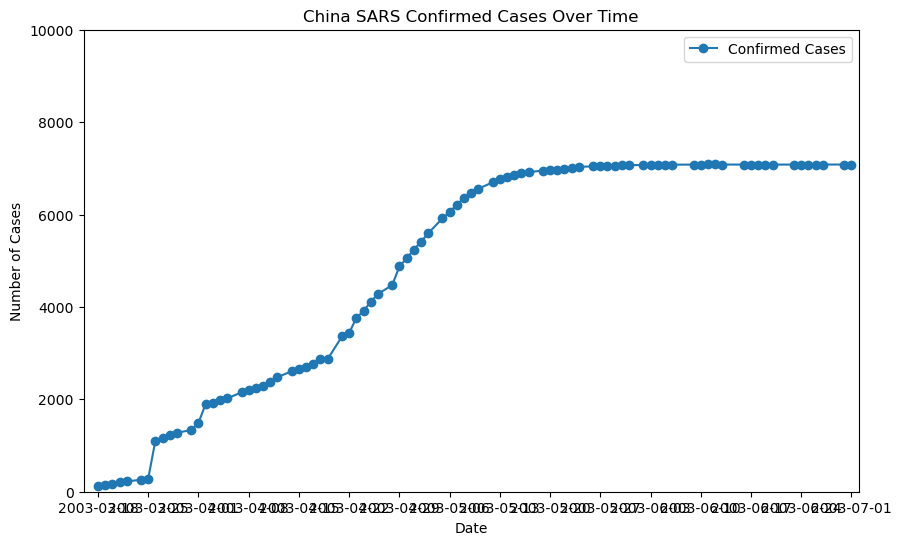

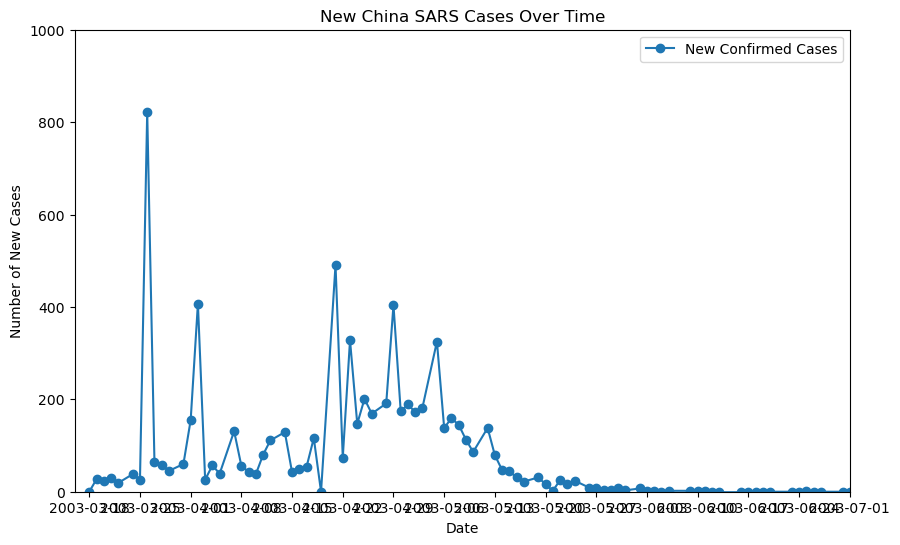

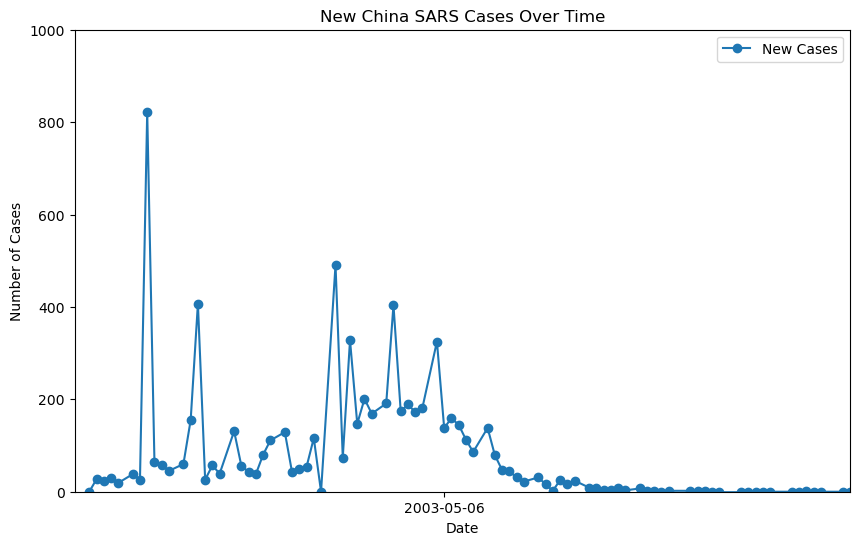

In [ ]:
# DESCRIBE THE DATASET BACKGROUND:
#Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.




# CODE
from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# %%
# Load the SARS Dataset
data = pd.read_csv("sars_china_hongkong_data_2003_cumulative.csv")
# Display the first few rows of the dataset
print(data.head())

# Preprocess the data to get the total confirmed cases over time for US
# data = data.loc[data["Country/Region"] == "US"].transpose().reset_index()
data = data.drop(index=0)  # drop the 'Country/Region' row
data.columns = ['date', 'confirmed_cases']
data['date'] = pd.to_datetime(data['date'])


# %%
# Plot the confirmed cases over time for first 2 months of data (until shutdown)
plt.figure(figsize=(10, 6))
plt.plot(data['date'],
         data['confirmed_cases'],
         label='Confirmed Cases',
         marker="o")
plt.ylim(0, 10000)
plt.xlabel('Date')
plt.xlim(pd.Timestamp('2003-03-16'), pd.Timestamp('2003-07-02'))
# Format ticks as M/D (no leading zeros)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.ylabel('Number of Cases')
plt.title('China SARS Confirmed Cases Over Time')
plt.legend()
plt.show()



data['new_cases'] = data['confirmed_cases'].diff().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(data['date'],
         data['new_cases'],
         label='New Confirmed Cases',
         marker="o")
plt.xlabel('Date')
plt.ylim(0, 1000)
plt.xlim(pd.Timestamp('2003-03-16'), pd.Timestamp('2003-07-01'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.ylabel('Number of New Cases')
plt.title('New China SARS Cases Over Time')
plt.legend()
plt.show()

# %%
# Let's look at new infections over time for the first year

plt.figure(figsize=(10, 6))
plt.plot(data['date'],
         data['new_cases'],
         label='New Cases',
         marker="o")
plt.xlabel('Date')
plt.xlim(pd.Timestamp('2003-03-16'), pd.Timestamp('2003-07-01'))
plt.ylim(0, 1000)

# Format ticks as M/Y (no leading zeros)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=12))
plt.ylabel('Number of Cases')
plt.title('New China SARS Cases Over Time')
plt.legend()
plt.show()


## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

We have now completed the background of our disease and our dataset, and now will focus on working withour data to find methods to use the points we were given to dervice/predict future infections.

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*

No questions as of now!